In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
import tensorflow as tf
#tf.__version__


In [3]:
img=image.load_img(r"C:\Users\DELL\NIT\cnn project\Training\Happy\3.jpg")


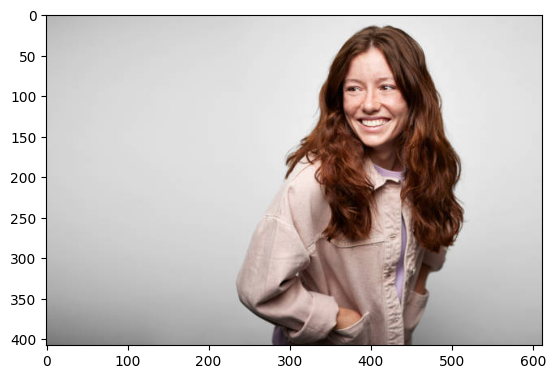

In [4]:
plt.imshow(img)

In [5]:
i1= cv2.imread(r"C:\Users\DELL\NIT\cnn project\Training\Happy\10.jpg")
i1

array([[[196, 140, 241],
        [199, 143, 244],
        [201, 145, 246],
        ...,
        [202, 150, 234],
        [213, 162, 242],
        [209, 160, 236]],

       [[193, 137, 238],
        [196, 140, 241],
        [198, 142, 243],
        ...,
        [192, 138, 228],
        [202, 150, 234],
        [198, 147, 227]],

       [[191, 135, 236],
        [192, 136, 237],
        [193, 137, 238],
        ...,
        [186, 127, 225],
        [193, 136, 229],
        [189, 133, 222]],

       ...,

       [[ 89, 173, 231],
        [ 88, 172, 230],
        [ 87, 171, 229],
        ...,
        [112,  85, 205],
        [110,  83, 203],
        [113,  86, 206]],

       [[ 89, 173, 231],
        [ 89, 173, 231],
        [ 90, 174, 232],
        ...,
        [114,  87, 207],
        [111,  84, 204],
        [113,  86, 206]],

       [[ 88, 172, 230],
        [ 90, 174, 232],
        [ 93, 177, 235],
        ...,
        [101,  74, 194],
        [ 98,  71, 191],
        [ 99,  72, 192]]

In [6]:
i1.shape  

(408, 612, 3)

In [7]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset=train.flow_from_directory(r"C:\Users\DELL\NIT\cnn project\training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r"C:\Users\DELL\NIT\cnn project\validation",
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

c:\Users\DELL\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
              )

In [13]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10


c:\Users\DELL\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 634ms/step - accuracy: 0.5694 - loss: 4.7765 - val_accuracy: 0.3333 - val_loss: 1.4409
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.1528 - loss: 1.8585 - val_accuracy: 0.3333 - val_loss: 0.7471
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - accuracy: 0.3750 - loss: 0.7543 - val_accuracy: 0.6000 - val_loss: 0.6780
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.6667 - loss: 0.6760

c:\Users\DELL\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6667 - loss: 0.6760 - val_accuracy: 0.9333 - val_loss: 0.6679
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - accuracy: 1.0000 - loss: 0.6332 - val_accuracy: 0.6667 - val_loss: 0.6021
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.6667 - loss: 0.6231 - val_accuracy: 0.6667 - val_loss: 0.5499
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - accuracy: 0.7222 - loss: 0.5295 - val_accuracy: 0.6667 - val_loss: 0.9025
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.6667 - loss: 0.8588 - val_accuracy: 0.6667 - val_loss: 0.5658
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.5417 - loss: 0.6400 - val_accuracy: 0.8333 - val_loss: 0.4753
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.7083 - loss: 0.7654 - val_accuracy: 0.9333 - val_loss: 0.6076


In [14]:
dir_path = r"C:\Users\DELL\NIT\cnn project\testing"
for i in os.listdir(dir_path ):
    print(i)
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    #plt.imshow(img)
    #plt.show()

10.jpg
11.jpg
19.jpg
2.jpg
5.jpg
6.jpg
7.jpg
9.jpg
a.jpg
d.jpg
e.jpg
g.jpg
h.jpg
j.jpg


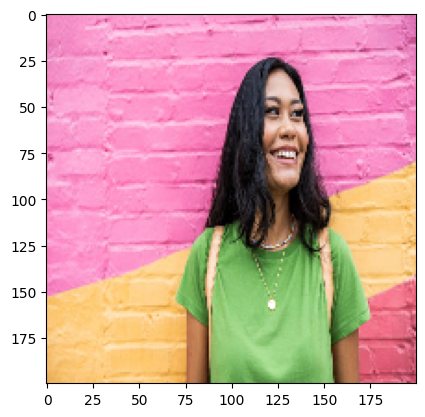

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
i am not happy


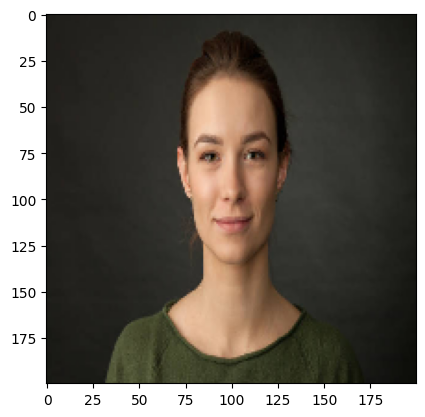

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
i am not happy


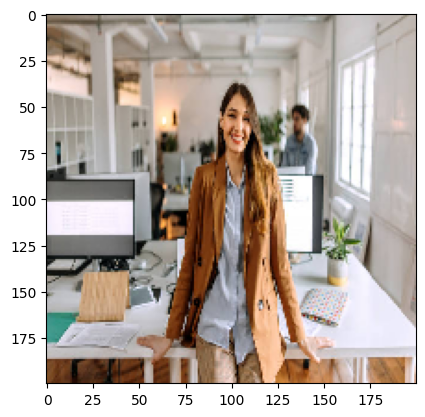

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
i am not happy


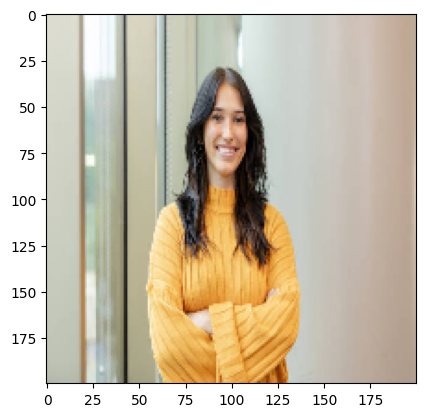

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
i am not happy


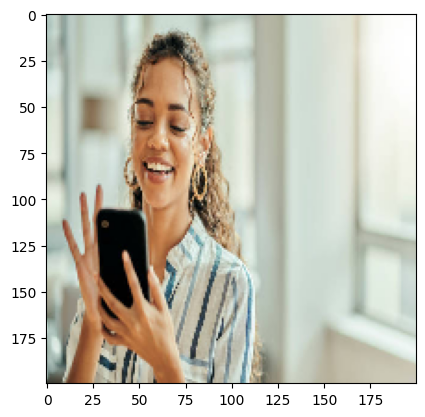

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
i am not happy


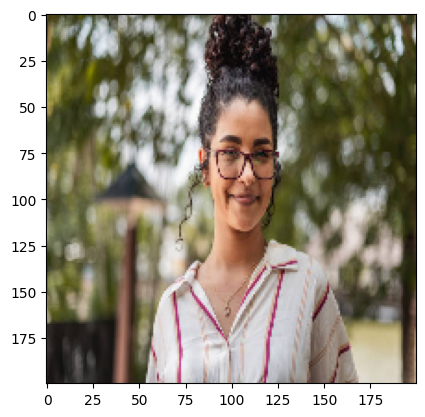

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
i am not happy


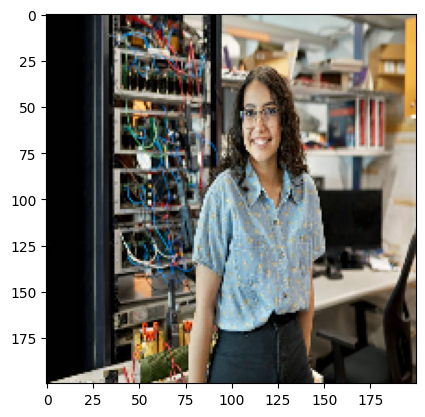

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
i am not happy


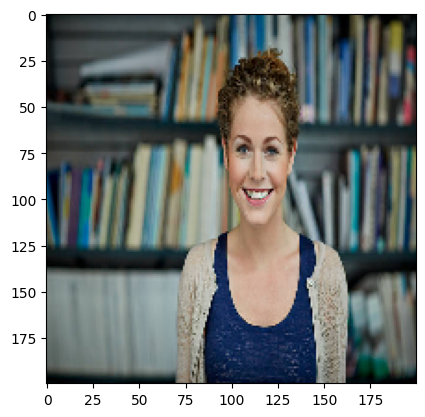

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
i am not happy


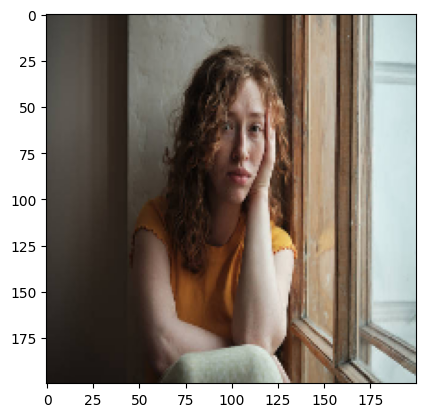

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
i am not happy


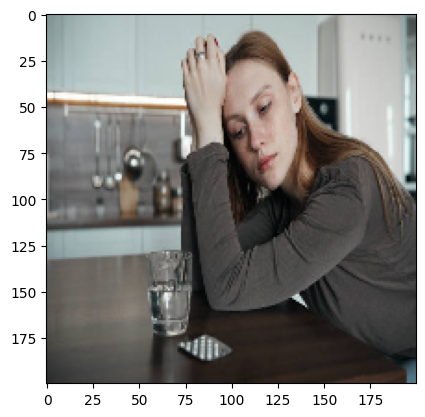

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
i am not happy


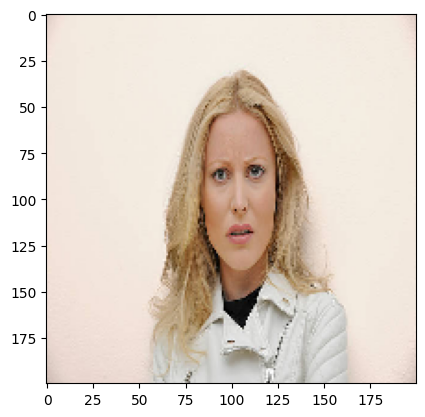

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
i am not happy


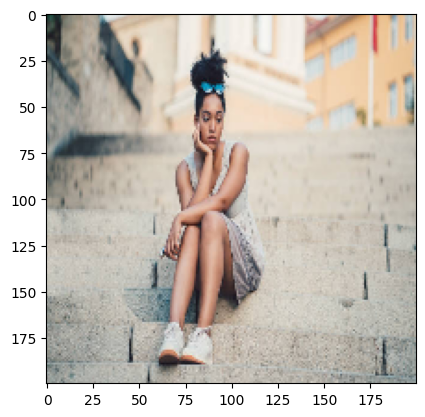

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
i am not happy


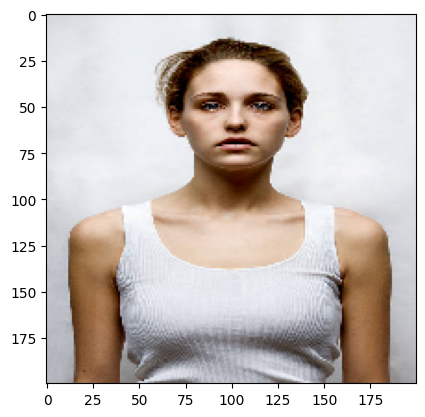

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
i am not happy


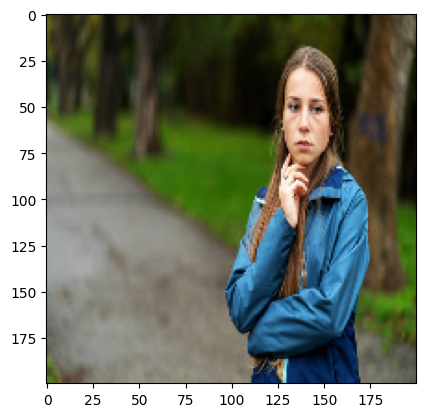

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
i am not happy


In [15]:
dir_path = r"C:\Users\DELL\NIT\cnn project\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am  happy')
    else:
        print('i am not happy')

In [16]:
history.history??

Object `history.history` not found.


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step - accuracy: 0.9444 - loss: 0.7126 - val_accuracy: 0.9000 - val_loss: 0.5857
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - accuracy: 0.6944 - loss: 0.6369 - val_accuracy: 0.8667 - val_loss: 0.4564
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 0.9028 - loss: 0.5303 - val_accuracy: 0.9667 - val_loss: 0.4584
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 1.0000 - loss: 0.4453 - val_accuracy: 0.8000 - val_loss: 0.4153
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.5417 - loss: 0.6199 - val_accuracy: 1.0000 - val_loss: 0.3597
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.9444 - loss: 0.3651 - val_accuracy: 0.6667 - val_loss: 0.7760
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step - accuracy: 0.7222 - loss: 0.6278 - val_accuracy: 0.6667 - val_loss: 0.5548
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.6667 - loss: 0.4740 - val_accuracy: 1.0000 - val_loss:

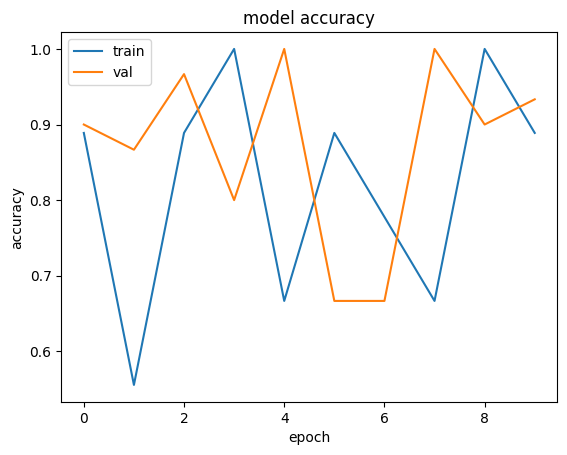

In [17]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()